# **Hands on Acitivity 9.1 Data Visualization using Pandas and Matplotlib**

**Name**: Calingo, Christian Lei

**Section**: CPE22S3

**Course**: Computational Thinking with Python

**Course Code**: CPE311

---
---
# **Instructions:**
*   Create a Python notebook to answer all shown procedures, exercises and analysis in this section.
---
---
# **Resources:**
*   Download the following datasets: earthquakes-1.csv Download earthquakes-1.csv, fb_stock_prices_2018.csv
---
---
# **Procedures**
# **9.1 Introduction to Matplotlib**









In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# **About the Data**

**In this notebook, we will be working with 2 datasets:**


*   **Facebook's stock price throughout 2018 (obtained using the stock_analysis
package)**
*   **Earthquake data from September 18, 2018 - October 13, 2018 (obtained from the US Geological Survey (USGS) using the USGS API)**


# **Plotting lines**




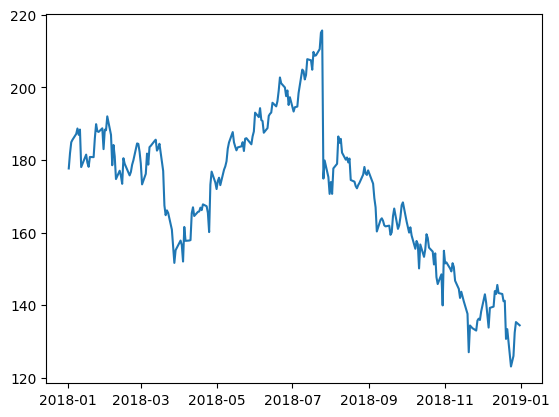

In [3]:
fb = pd.read_csv(
'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
plt.plot(fb.index, fb.open)
plt.show()

**Since we are working in a Jupyter notebook, we can use the magic command %matplotlib inline once and not have to call plt.show() for each plot**

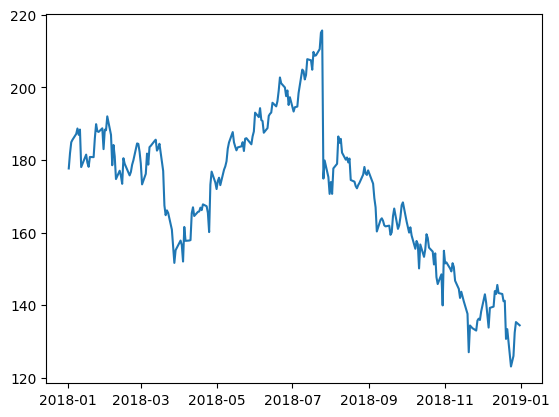

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
fb = pd.read_csv(
'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
plt.plot(fb.index, fb.open)

# **Scatter plots**

**We can pass in a string specifying the style of the plot. This is of the form '[color][marker][linestyle]'. For example, we can make a black dashed line with 'k--' or a red scatter plot with 'ro'**

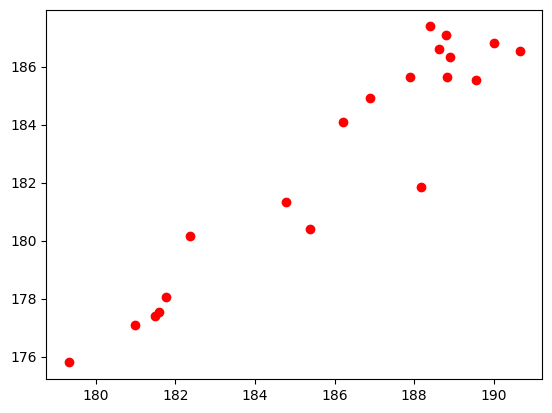

In [5]:
plt.plot('high', 'low', 'ro', data=fb.head(20))

# **Histograms**

(array([6.400e+01, 4.450e+02, 1.137e+03, 1.853e+03, 2.114e+03, 8.070e+02,
        2.800e+02, 9.200e+01, 9.000e+00, 2.000e+00]),
 array([-1.26 , -0.624,  0.012,  0.648,  1.284,  1.92 ,  2.556,  3.192,
         3.828,  4.464,  5.1  ]),
 <BarContainer object of 10 artists>)

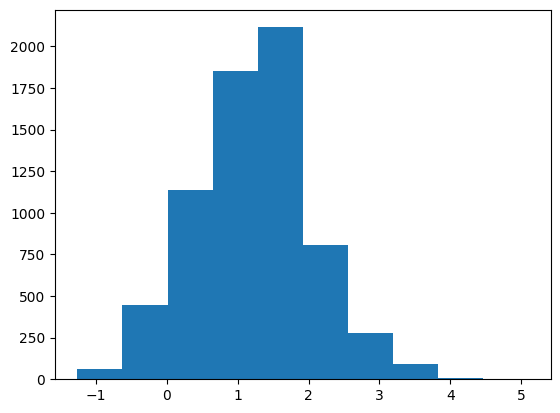

In [6]:
quakes = pd.read_csv('data/earthquakes.csv')
plt.hist(quakes.query('magType == "ml"').mag)

# **Bin size matters**

**Notice how our assumptions of the distribution of the data can change based on the number of bins (look at the drop between the two highest peaks on the righthand plot)**

Text(0.5, 1.0, 'bins param: 35')

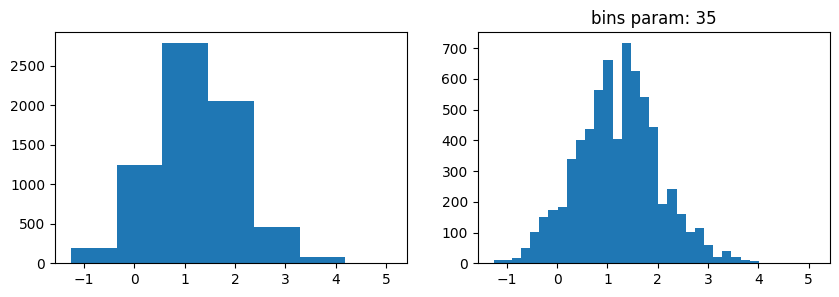

In [7]:
x = quakes.query('magType == "ml"').mag
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for ax, bins in zip(axes, [7, 35]):
  ax.hist(x, bins=bins)
ax.set_title(f'bins param: {bins}')

# **Plot components**

# Figure
**Top-level object that holds the other plot components.**

In [8]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

# **Axes**

**Individual plots contained within the Figure**

# **Creating subplots**

**Simply specify the number of rows and columns to create**

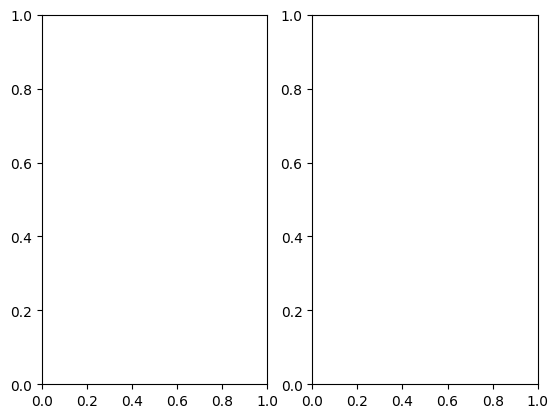

In [9]:
fig, axes = plt.subplots(1, 2)

**As an alternative to using plt.subplots() we can add the Axes to the Figure on our own. This allows for some more complex layouts, such as picture in picture**

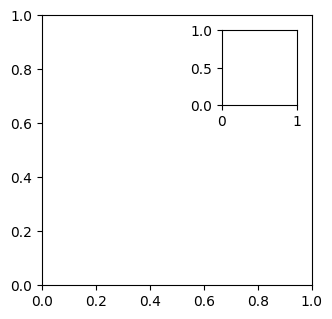

In [10]:
fig = plt.figure(figsize=(3, 3))
outside = fig.add_axes([0.1, 0.1, 0.9, 0.9])
inside = fig.add_axes([0.7, 0.7, 0.25, 0.25])

# **Creating Plot Layouts with gridspec**

**We can create subplots with varying sizes as well:**

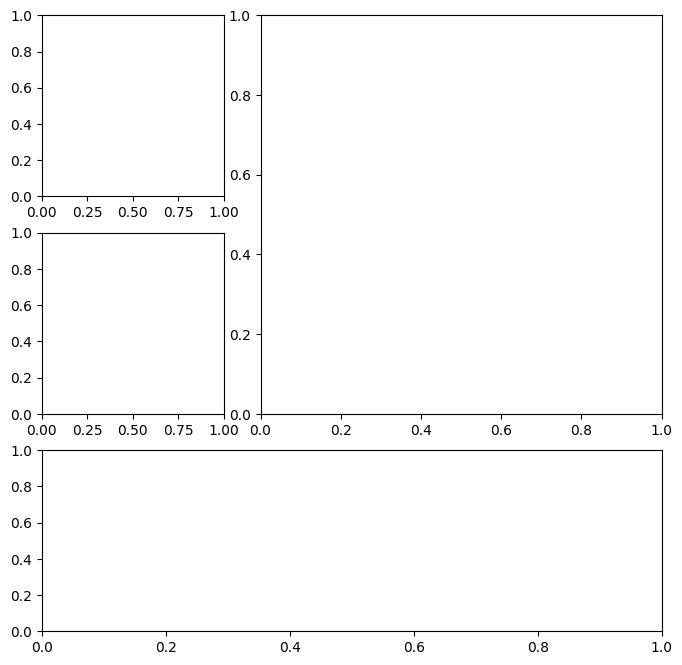

In [11]:
fig = plt.figure(figsize=(8, 8))
gs = fig.add_gridspec(3, 3)
top_left = fig.add_subplot(gs[0, 0])
mid_left = fig.add_subplot(gs[1, 0])
top_right = fig.add_subplot(gs[:2, 1:])
bottom = fig.add_subplot(gs[2,:])
fig.savefig('empty.png')

# **Cleaning up**

**It's important to close resources when we are done with them. We use plt.close() to do so. If we pass in nothing, it will close the last plot, but we can pass the specific Figure to close or say 'all' to close all Figure objects that are open. Let's close all the Figure objects that are open with plt.close()**

In [12]:
plt.close('all')

# **Additional plotting options**

# Specifying figure size

**Just pass the figsize parameter to plt.figure() . It's a tuple of (width, height)**

In [13]:
fig = plt.figure(figsize=(10, 4))

<Figure size 1000x400 with 0 Axes>

**This can be specified when creating subplots as well:**

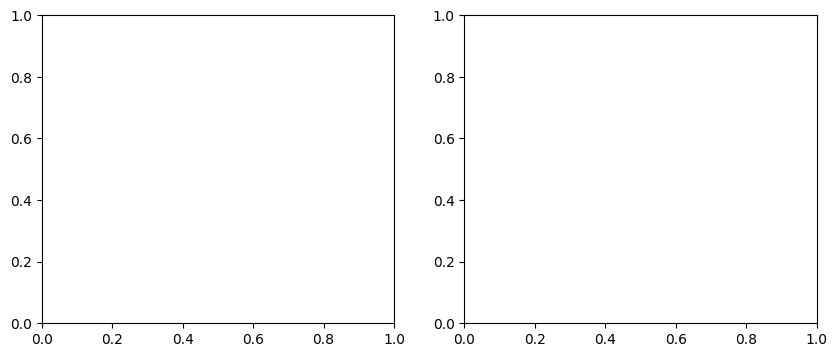

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# **rcParams**

**A small subset of all the available plot settings (shuffling to get a good variation of options)**

In [15]:
import random
import matplotlib as mpl
rcparams_list = list(mpl.rcParams.keys())
random.seed(20) # make this repeatable
random.shuffle(rcparams_list)
sorted(rcparams_list[:20])

['animation.convert_args',
 'axes.edgecolor',
 'axes.formatter.use_locale',
 'axes.spines.right',
 'boxplot.meanprops.markersize',
 'boxplot.showfliers',
 'keymap.home',
 'lines.markerfacecolor',
 'lines.scale_dashes',
 'mathtext.rm',
 'patch.force_edgecolor',
 'savefig.facecolor',
 'svg.fonttype',
 'text.hinting_factor',
 'xtick.alignment',
 'xtick.minor.top',
 'xtick.minor.width',
 'ytick.left',
 'ytick.major.left',
 'ytick.minor.width']

**We can check the current default figsize using rcParams**

In [16]:
mpl.rcParams['figure.figsize']

[6.4, 4.8]

**We can also update this value to change the default (until the kernel is restarted)**

In [17]:
mpl.rcParams['figure.figsize'] = (300, 10)
mpl.rcParams['figure.figsize']


[300.0, 10.0]

**Use rcdefaults() to restore the defaults**

In [18]:
mpl.rcdefaults()
mpl.rcParams['figure.figsize']

[6.4, 4.8]

**This can also be done via pyplot**

In [19]:
plt.rc('figure', figsize=(20, 20)) # change figsize default to (20, 20)
plt.rcdefaults() # reset the default

---
---
---


# **9.2 Plotting with Pandas**



In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
fb = pd.read_csv(
'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
quakes = pd.read_csv('data/earthquakes.csv')

# **Evolution over time**

**Line plots help us see how a variable changes over time. They are the default for the kind argument, but we can pass kind='line' to be explicit in our intent**:

<Axes: title={'center': 'Evolution of Facebook Open Price'}, xlabel='date'>

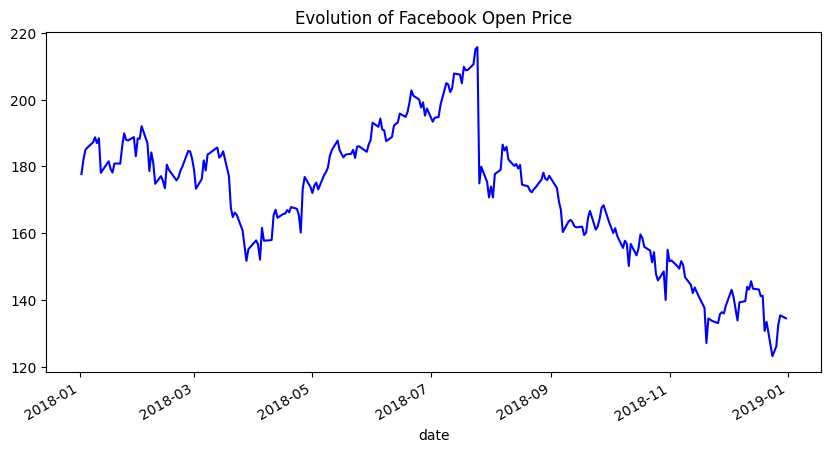

In [21]:
fb.plot(
kind='line',
y='open',
figsize=(10, 5),
style='b-',
legend=False,
title='Evolution of Facebook Open Price'
)

**We provided the style argument in the previous example; however, we can use the color and linestyle arguments to get the same result:**


<Axes: title={'center': 'Evolution of Facebook Open Price'}, xlabel='date'>

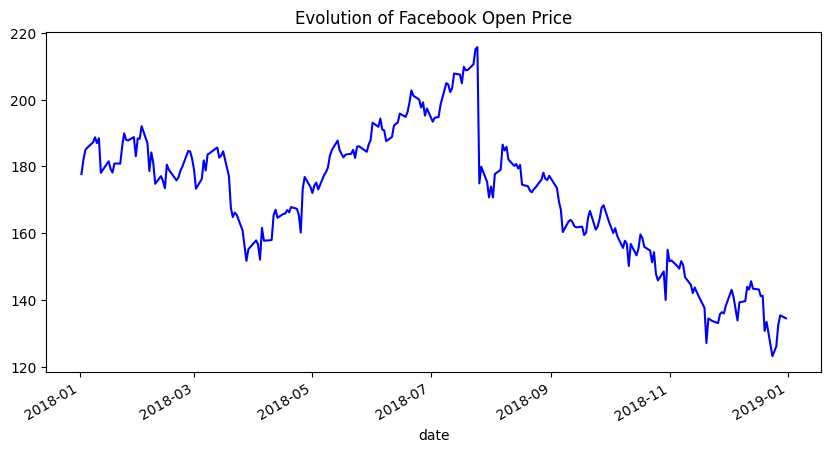

In [22]:
fb.plot(
kind='line',
y='open',
figsize=(10, 5),
color='blue',
linestyle='solid',
legend=False,
title='Evolution of Facebook Open Price'
)

**We can also plot many lines at once by simply passing a list of the columns to plot**

<Axes: title={'center': 'Facebook OHLC Prices during 1st Week of Trading 2018'}, xlabel='date'>

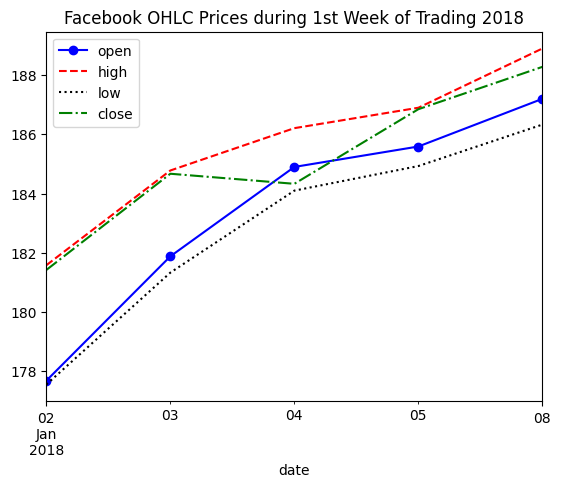

In [23]:
fb.iloc[:5,].plot(
y=['open', 'high', 'low', 'close'],
style=['b-o', 'r--', 'k:', 'g-.'],
title='Facebook OHLC Prices during 1st Week of Trading 2018'
)

# **Creating subplots**

**When plotting with pandas, creating subplots is simply a matter of passing subplots=True to the plot() method, and (optionally) specifying the layout in a tuple of (rows, columns)**

array([[<Axes: xlabel='date'>, <Axes: xlabel='date'>],
       [<Axes: xlabel='date'>, <Axes: xlabel='date'>],
       [<Axes: xlabel='date'>, <Axes: xlabel='date'>]], dtype=object)

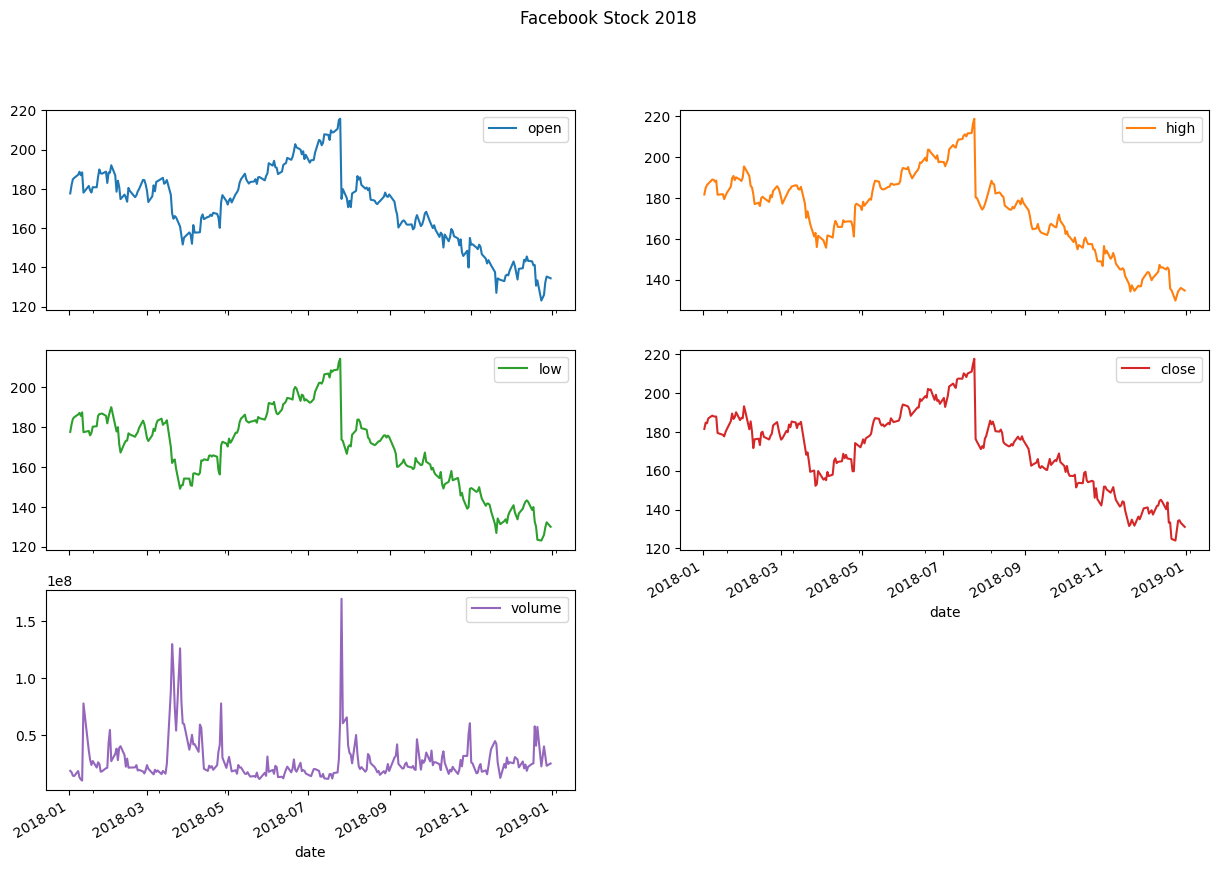

In [24]:
fb.plot(
kind='line',
subplots=True,
layout=(3,2),
figsize=(15,10),
title='Facebook Stock 2018'
)

**Note that we didn't provide a specific column to plot and pandas plotted all of them for us**

# **Visualizing relationships between variables**

# Scatter plots

**We make scatter plots to help visualize the relationship between two variables. Creating scatter plots requires we pass in kind='scatter' along with a column for the x-axis and a column for the y-axis**

<Axes: title={'center': 'Facebook Daily High - Low vs. log(Volume Traded)'}, xlabel='volume', ylabel='max_abs_change'>

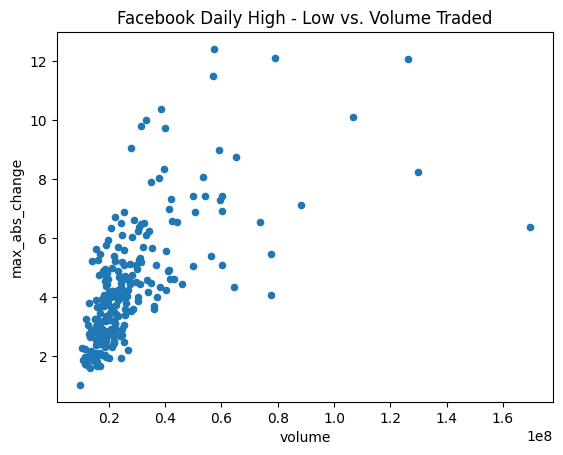

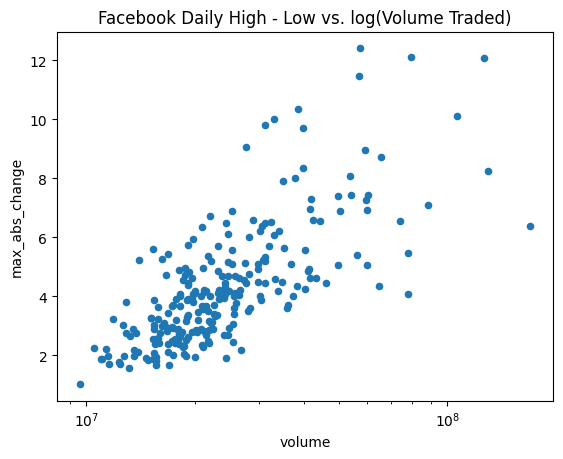

In [25]:
fb.assign(
max_abs_change=fb.high - fb.low
).plot(
kind='scatter', x='volume', y='max_abs_change',
title='Facebook Daily High - Low vs. Volume Traded'
)
fb.assign(
max_abs_change=fb.high - fb.low
).plot(
kind='scatter', x='volume', y='max_abs_change',
title='Facebook Daily High - Low vs. log(Volume Traded)',
logx=True
)


**The relationship doesn't seem to be linear, but we can try a log transform on the x-axis since the scales of the axes are very different. With pandas, we simply pass in logx=True**

<Axes: title={'center': 'Facebook Daily High - Low vs. log(Volume Traded)'}, xlabel='volume', ylabel='max_abs_change'>

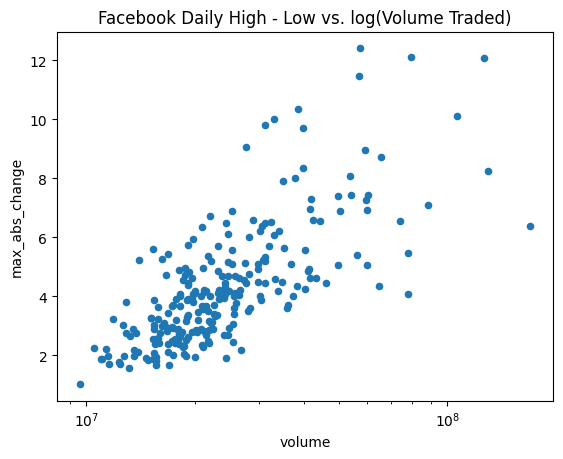

In [26]:
fb.assign(
max_abs_change=fb.high - fb.low
).plot(
kind='scatter', x='volume', y='max_abs_change',
title='Facebook Daily High - Low vs. log(Volume Traded)',
logx=True
)


**With matplotlib, we could use plt.xscale('log') to do the same thing**

# **Adding Transparency to Plots with alpha**

**Sometimes our plots have many overlapping values, but this can be impossible to see. This can be addressed by increasing the transparency of what we are plotting using the alpha parameter. It is a float on [0, 1] where 0 is completely transparent and 1 is completely opaque. By default this is 1, so let's put in a lower value and re-plot the scatter plot**

<Axes: title={'center': 'Facebook Daily High - Low vs. log(Volume Traded)'}, xlabel='volume', ylabel='max_abs_change'>

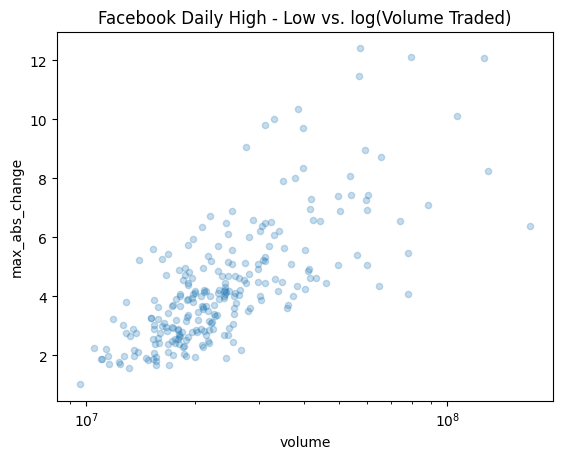

In [27]:
fb.assign(
max_abs_change=fb.high - fb.low
).plot(
kind='scatter', x='volume', y='max_abs_change',
title='Facebook Daily High - Low vs. log(Volume Traded)',
logx=True, alpha=0.25
)

# **Hexbins**

**In the previous example, we can start to see the overlaps, but it is still difficult. Hexbins are another plot type that divide up the plot into hexagons, which are shaded according to the density of points there. With pandas, this is the hexbin value for the kind argument. It can also be important to tweak the gridsize , which determines the number of hexagons along the y-axis**

<Axes: title={'center': 'Facebook Daily High - Low vs. log(Volume Traded)'}, xlabel='log_volume', ylabel='max_abs_change'>

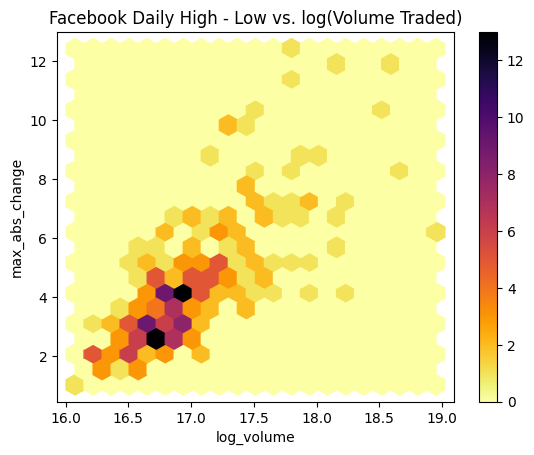

In [28]:
fb.assign(
log_volume=np.log(fb.volume),
max_abs_change=fb.high - fb.low
).plot(
kind='hexbin',
x='log_volume',
y='max_abs_change',
title='Facebook Daily High - Low vs. log(Volume Traded)',
colormap='inferno_r',
gridsize=20,
sharex=False # we have to pass this to see the x-axis due to a bug in this version of pandas
)

# **Visualizing Correlations with Heatmaps**

**Pandas doesn't offer heatmaps; however, if we are able to get our data into a matrix, we can use matshow() from matplotlib**

<ipython-input-29-d18329addf41>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels, rotation=45)
<ipython-input-29-d18329addf41>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


[Text(0, -1.0, ''),
 Text(0, 0.0, 'open'),
 Text(0, 1.0, 'high'),
 Text(0, 2.0, 'low'),
 Text(0, 3.0, 'close'),
 Text(0, 4.0, 'volume'),
 Text(0, 5.0, 'log_volume'),
 Text(0, 6.0, 'max_abs_change'),
 Text(0, 7.0, '')]

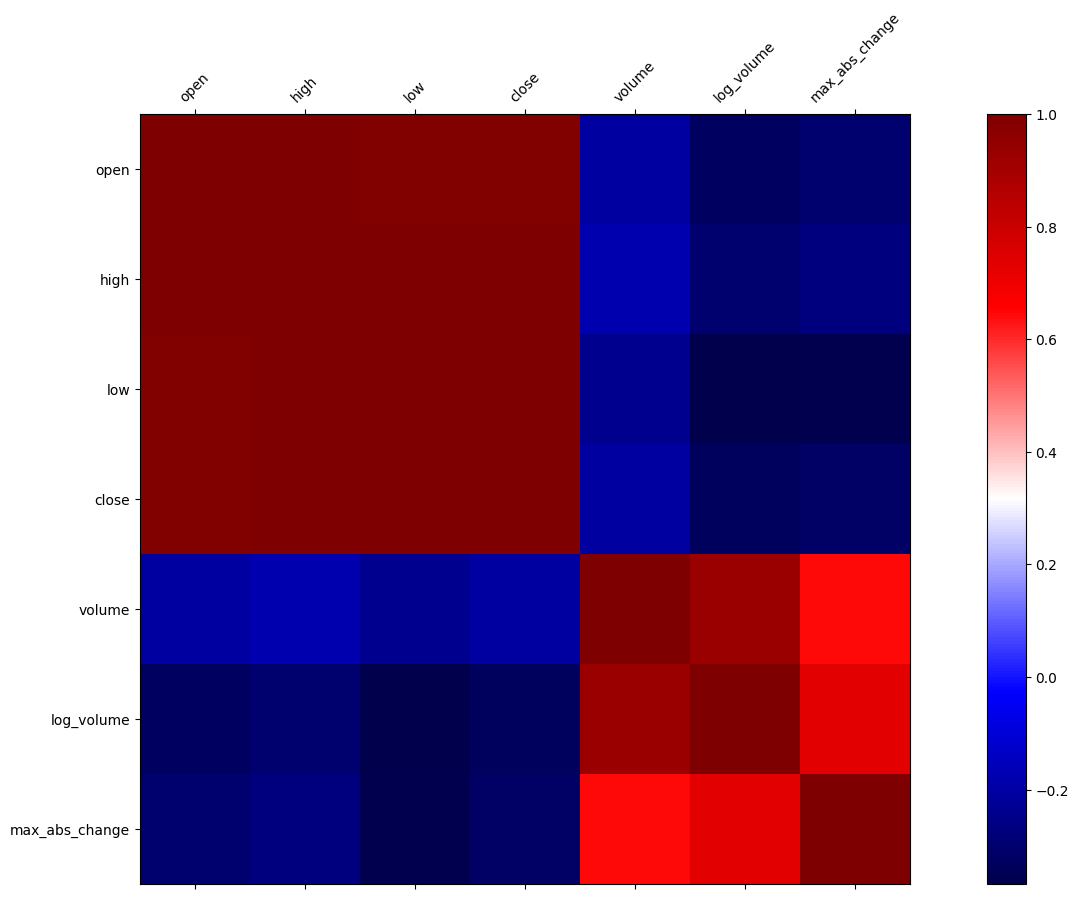

In [29]:
fig, ax = plt.subplots(figsize=(20, 10))
fb_corr = fb.assign(
log_volume=np.log(fb.volume),
max_abs_change=fb.high - fb.low
).corr()
im = ax.matshow(fb_corr, cmap='seismic')
fig.colorbar(im)

labels = [col.lower() for col in fb_corr.columns]
ax.set_xticklabels([''] + labels, rotation=45)
ax.set_yticklabels([''] + labels)

In [30]:
fb_corr.loc['max_abs_change', ['volume', 'log_volume']]

volume        0.642027
log_volume    0.731542
Name: max_abs_change, dtype: float64

# **Visualizing distributions**

# Histograms

**With the pandas plot() method, making histograms is as easy as passing in kind='hist'**

Text(0.5, 0, 'Volume traded')

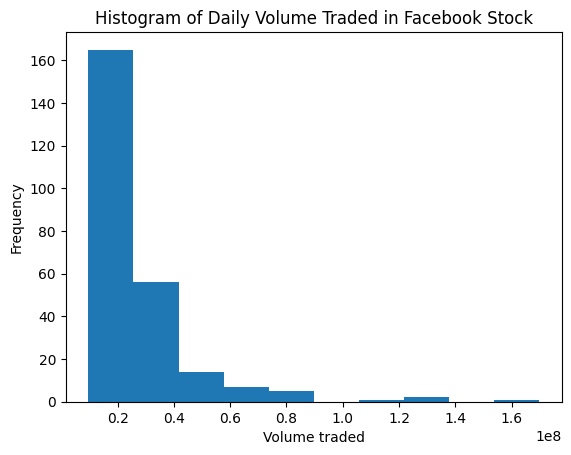

In [31]:
fb.volume.plot(
kind='hist',
title='Histogram of Daily Volume Traded in Facebook Stock'
)
plt.xlabel('Volume traded')

**We can overlap histograms to compare distributions provided we use the alpha parameter. For example, let's compare the usage and magnitude of the various magTypes in the data:**

Text(0.5, 0, 'magnitude')

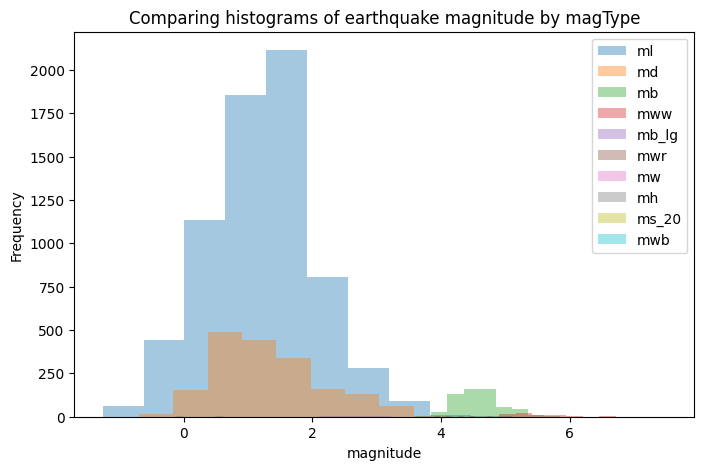

In [32]:
fig, axes = plt.subplots(figsize=(8, 5))
for magtype in quakes.magType.unique():
  data = quakes.query(f'magType == "{magtype}"').mag
  if not data.empty:
    data.plot(
        kind='hist', ax=axes, alpha=0.4,
        label=magtype, legend=True,
        title='Comparing histograms of earthquake magnitude by magType')
plt.xlabel('magnitude')

# **Kernel Density Estimation (KDE)**

**We can pass kind='kde' for a probability density function (PDF), which tells us the probability of getting a particular value**


Text(0.5, 0, 'Price ($)')

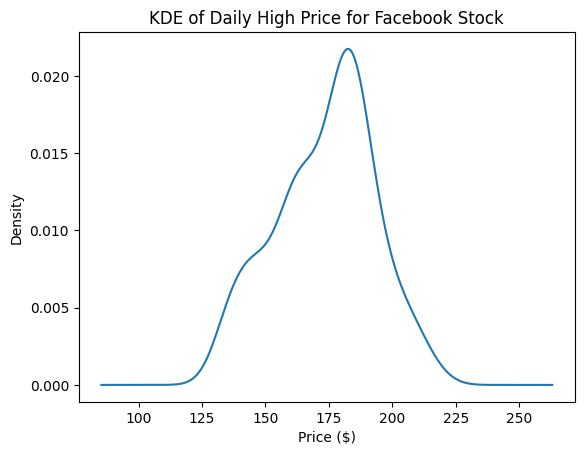

In [33]:
fb.high.plot(
kind='kde',
title='KDE of Daily High Price for Facebook Stock'
)
plt.xlabel('Price ($)')

# **Adding to the result of plot()**

**The plot() method returns a matplotlib Axes object. We can store this for additional customization of the plot, or we can pass this into another call to plot() as the ax argument to add to the original plot.**

**It can often be helpful to view the KDE superimposed on top of the histogram, which can be achieved with this strategy:**

Text(0.5, 0, 'Price ($)')

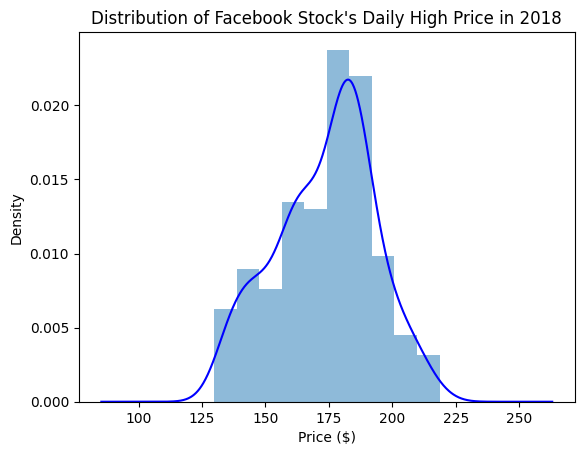

In [34]:
ax = fb.high.plot(kind='hist', density=True, alpha=0.5)
fb.high.plot(
ax=ax, kind='kde', color='blue',
title='Distribution of Facebook Stock\'s Daily High Price in 2018'
)
plt.xlabel('Price ($)')

# **Plotting the ECDF**

**In some cases, we are more interested in the probability of getting less than or equal to that value (or greater than or equal), which we can see with the cumulative disribution function (CDF). Using the statsmodels package, we can estimate the CDF giving us the empirical cumulative distribution function (ECDF)**

Text(0.5, 1.0, 'ECDF of earthquake magnitude with magType ml')

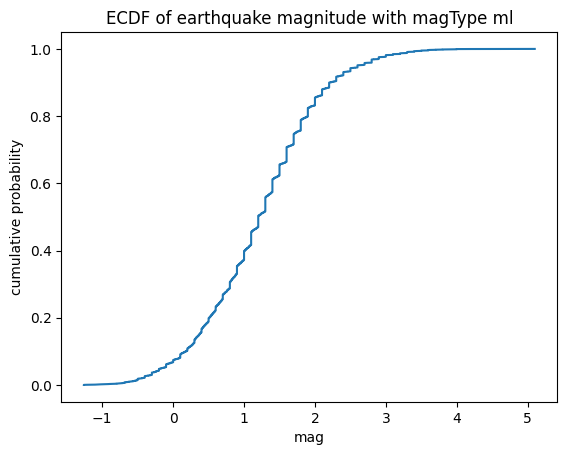

In [35]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(quakes.query('magType == "ml"').mag)
plt.plot(ecdf.x, ecdf.y)
plt.xlabel('mag') # add x-axis label
plt.ylabel('cumulative probability') # add y-axis label
plt.title('ECDF of earthquake magnitude with magType ml')

**This ECDF tells us the probability of getting an earthquake with magnitude of 3 or less using the ml scale is 98%**

Text(0.5, 1.0, 'P(mag <= 3) = 98%')

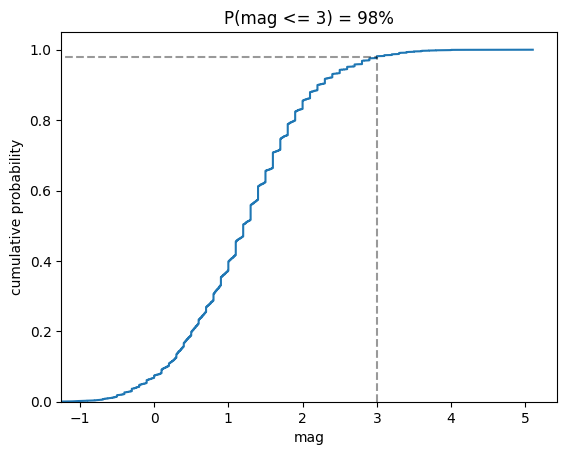

In [36]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(quakes.query('magType == "ml"').mag)
plt.plot(ecdf.x, ecdf.y)
# axis labels
plt.xlabel('mag') # add x-axis label
plt.ylabel('cumulative probability') # add y-axis label
# add reference lines for interpreting the ECDF for mag <= 3
plt.plot(
[3, 3], [0, .98], 'k--',
[-1.5, 3], [0.98, 0.98], 'k--', alpha=0.4
)
# set axis ranges
plt.ylim(0, None)
plt.xlim(-1.25, None)
# add a title
plt.title('P(mag <= 3) = 98%')

# **Box plots**

**To make box plots with pandas, we pass kind='box' to the plot() method**

Text(0, 0.5, 'price ($)')

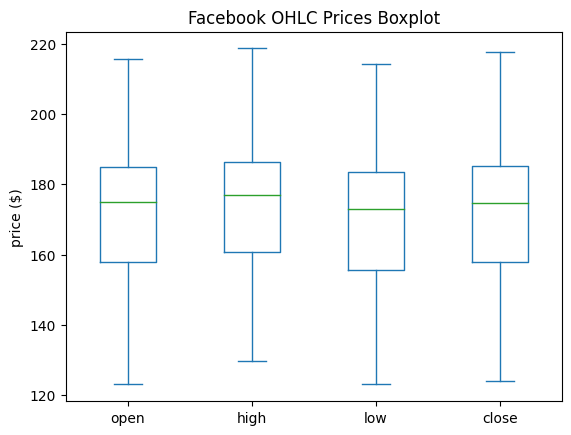

In [37]:
fb.iloc[:,:4].plot(kind='box', title='Facebook OHLC Prices Boxplot')
plt.ylabel('price ($)')

**This can also be combined with a groupby()**

Text(0.5, 1.1, 'Facebook OHLC Boxplots by Volume Traded')

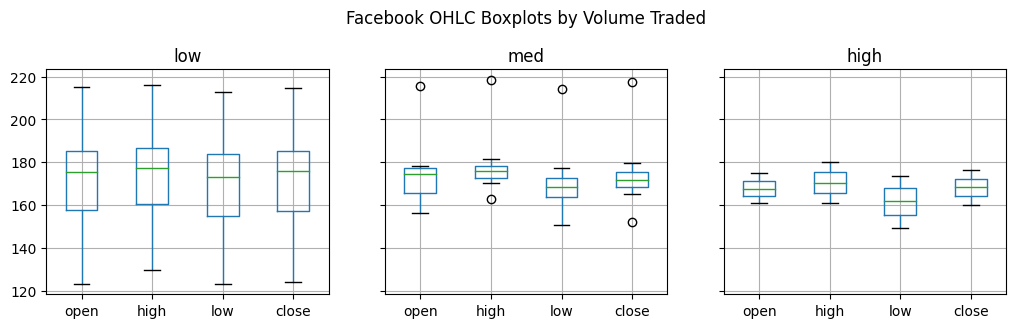

In [38]:
fb.assign(
volume_bin=pd.cut(fb.volume, 3, labels=['low', 'med', 'high'])
).groupby('volume_bin').boxplot(
column=['open', 'high', 'low', 'close'],
layout=(1, 3), figsize=(12, 3)
)
plt.suptitle('Facebook OHLC Boxplots by Volume Traded', y=1.1)

**We can use this to see the distribution of magnitudes across the different measurement methods for earthquakes**

Text(0, 0.5, 'magnitude')

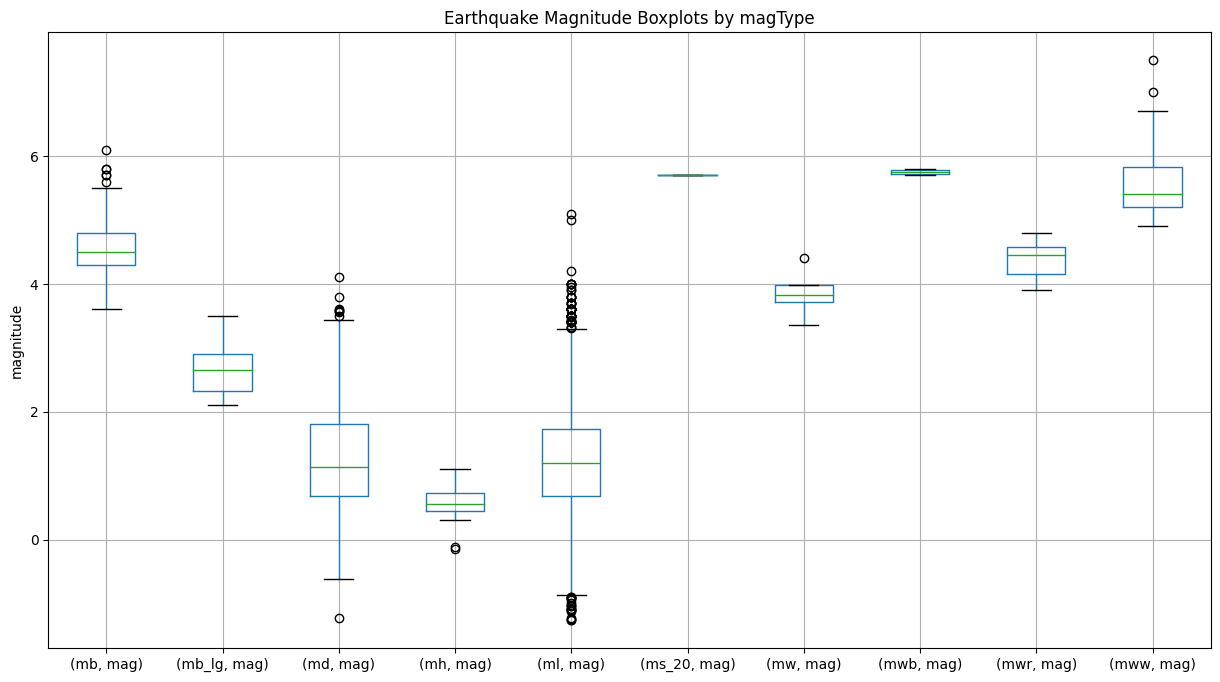

In [39]:
quakes[['mag', 'magType']].groupby('magType').boxplot(
figsize=(15, 8), subplots=False
)
plt.title('Earthquake Magnitude Boxplots by magType')
plt.ylabel('magnitude')

# **Counts and frequencies**

# Bar charts

**With pandas, we have the option of using the kind argument or using plot.<kind>() . Let's use plot.bar() here to show the evolution of monthly volume traded in Facebook stock over time**

Text(0, 0.5, 'volume')

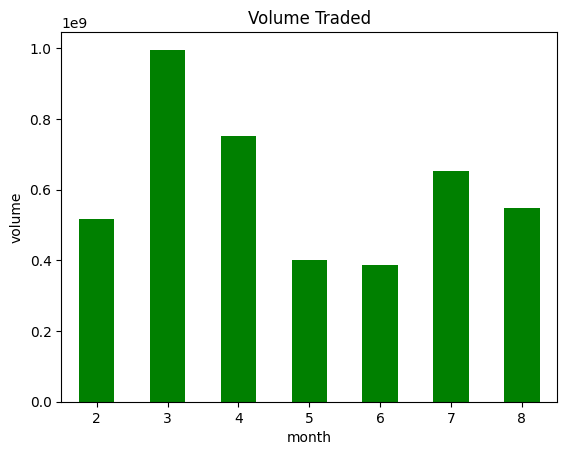

In [40]:
fb['2018-02':'2018-08'].assign(
month=lambda x: x.index.month
).groupby('month').sum().volume.plot.bar(
color='green', rot=0, title='Volume Traded'
)
plt.ylabel('volume')

**We can also change the orientation of the bars. Passing kind='barh' gives us horizontal bars instead of vertical ones. Let's use this to look at the top 15 places for earthquakes in our data**

Text(0.5, 0, 'earthquakes')

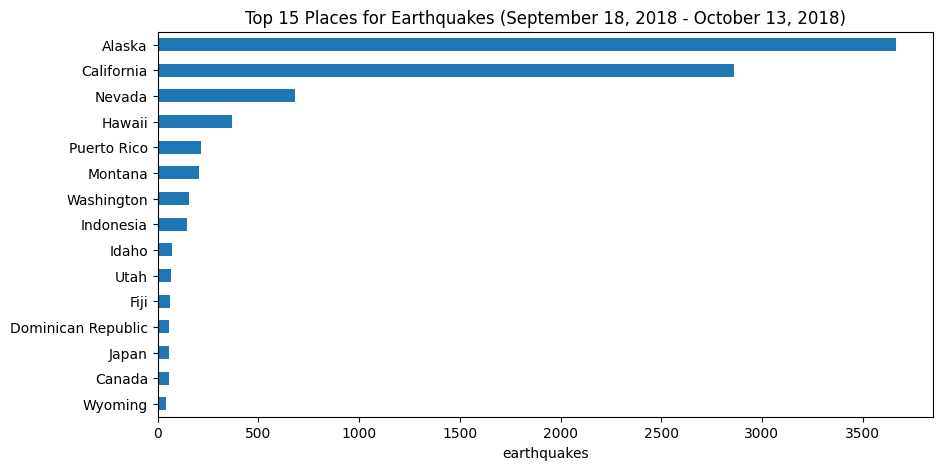

In [41]:
quakes.parsed_place.value_counts().iloc[14::-1,].plot(
kind='barh', figsize=(10, 5),
title='Top 15 Places for Earthquakes '\
'(September 18, 2018 - October 13, 2018)'
)
plt.xlabel('earthquakes')

**We also have data on whether earthquakes were accompanied by tsunamis. Let's see what the top places for tsunamis are**

Text(0.5, 0, 'tsunamis')

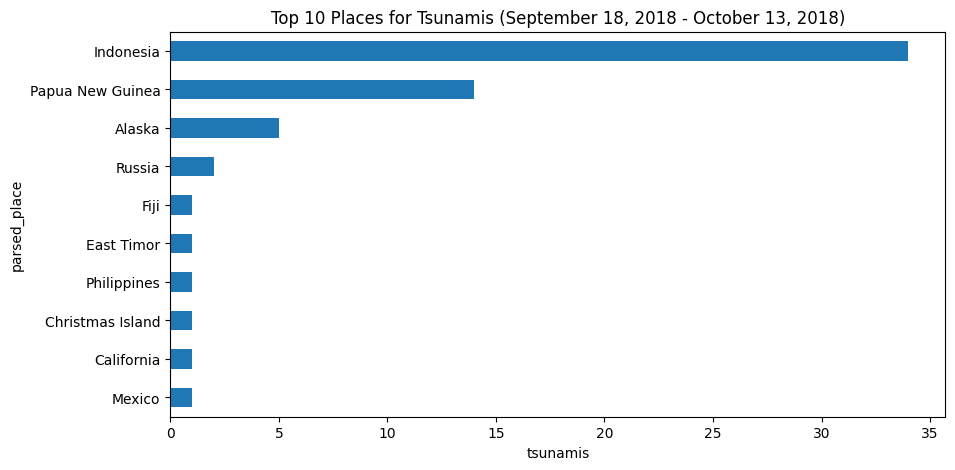

In [42]:
quakes.groupby('parsed_place').tsunami.sum().sort_values().iloc[-10::,].plot(
kind='barh', figsize=(10, 5),
title='Top 10 Places for Tsunamis '\
'(September 18, 2018 - October 13, 2018)'
)
plt.xlabel('tsunamis')

**Seeing that Indonesia is the top place for tsunamis during the time period we are looking at, we may want to look how many earthquakes and tsunamis Indonesia gets on a daily basis. We could show this as a line plot or with bars; since this section is about bars, we will use bars here:**

<ipython-input-43-d19e56ba2114>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ).set_index('time').resample('1D').sum()


Text(0, 0.5, 'count')

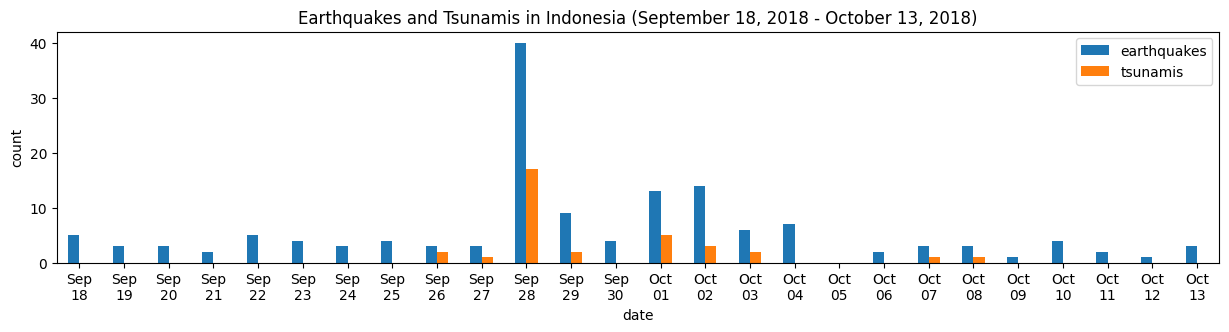

In [43]:
indonesia_quakes = quakes.query('parsed_place == "Indonesia"').assign(
time=lambda x: pd.to_datetime(x.time, unit='ms'),
earthquake=1
).set_index('time').resample('1D').sum()
indonesia_quakes.index = indonesia_quakes.index.strftime('%b\n%d')
indonesia_quakes.plot(
y=['earthquake', 'tsunami'], kind='bar', figsize=(15, 3), rot=0,
label=['earthquakes', 'tsunamis'],
title='Earthquakes and Tsunamis in Indonesia '\
'(September 18, 2018 - October 13, 2018)'
)
plt.xlabel('date')
plt.ylabel('count')

**Using the kind arugment for vertical bars when the labels for each bar are shorter**

Text(0, 0.5, 'earthquakes')

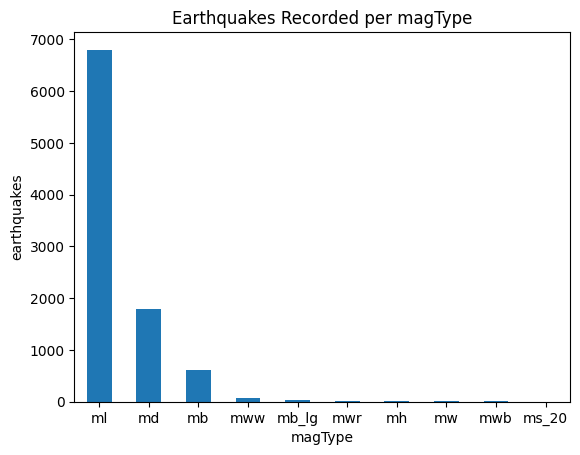

In [44]:
quakes.magType.value_counts().plot(
kind='bar', title='Earthquakes Recorded per magType', rot=0
)
plt.xlabel('magType')
plt.ylabel('earthquakes')

**Top 4 places with earthquakes**

Text(0, 0.5, 'earthquakes')

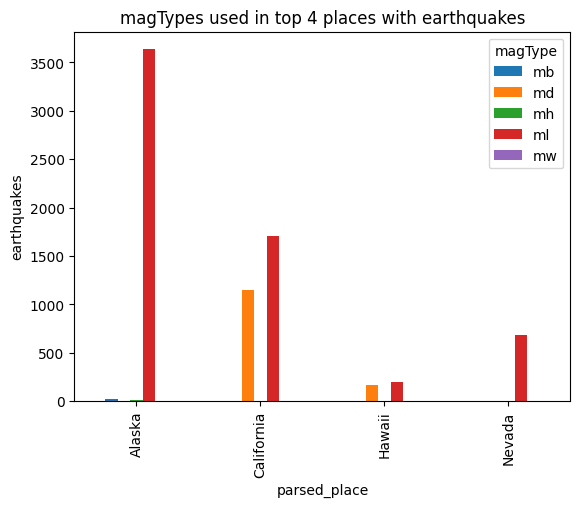

In [45]:
quakes[
quakes.parsed_place.isin(['California', 'Alaska', 'Nevada', 'Hawaii'])
].groupby(['parsed_place', 'magType']).mag.count().unstack().plot.bar(
title='magTypes used in top 4 places with earthquakes'
)
plt.ylabel('earthquakes')

**Stacked bar chart**

Text(0, 0.5, 'earthquakes')

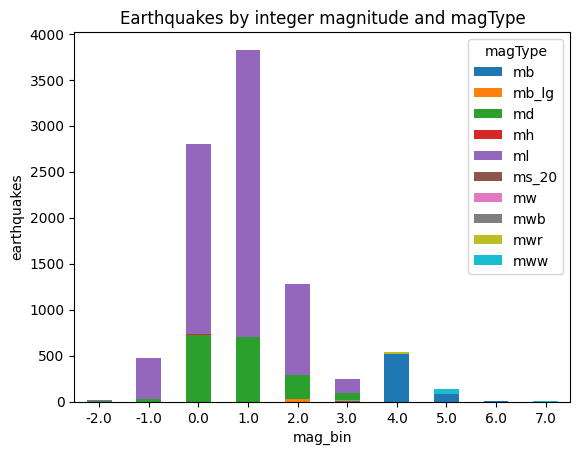

In [46]:
pivot = quakes.assign(
mag_bin=lambda x: np.floor(x.mag)
).pivot_table(
index='mag_bin', columns='magType', values='mag', aggfunc='count'
)
pivot.plot.bar(
stacked=True, rot=0,
title='Earthquakes by integer magnitude and magType'
)
plt.ylabel('earthquakes')

# **Normalized stacked bars**

**Plot the percentages to be better able to see the different magTypes**

Text(0, 0.5, 'percentage')

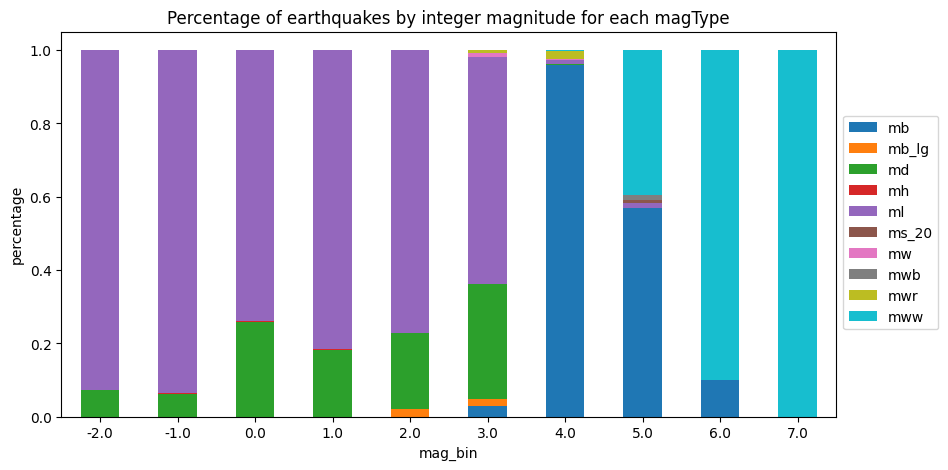

In [47]:
normalized_pivot = pivot.fillna(0).apply(lambda x: x/x.sum(), axis=1)
ax = normalized_pivot.plot.bar(
stacked=True, rot=0, figsize=(10, 5),
title='Percentage of earthquakes by integer magnitude for each magType'
)
ax.legend(bbox_to_anchor=(1, 0.8)) # move legend to the right of the plot
plt.ylabel('percentage')

---
---
---
# **9.3 Pandas Plotting Subpackage**





array([[<Axes: xlabel='open', ylabel='open'>,
        <Axes: xlabel='high', ylabel='open'>,
        <Axes: xlabel='low', ylabel='open'>,
        <Axes: xlabel='close', ylabel='open'>,
        <Axes: xlabel='volume', ylabel='open'>],
       [<Axes: xlabel='open', ylabel='high'>,
        <Axes: xlabel='high', ylabel='high'>,
        <Axes: xlabel='low', ylabel='high'>,
        <Axes: xlabel='close', ylabel='high'>,
        <Axes: xlabel='volume', ylabel='high'>],
       [<Axes: xlabel='open', ylabel='low'>,
        <Axes: xlabel='high', ylabel='low'>,
        <Axes: xlabel='low', ylabel='low'>,
        <Axes: xlabel='close', ylabel='low'>,
        <Axes: xlabel='volume', ylabel='low'>],
       [<Axes: xlabel='open', ylabel='close'>,
        <Axes: xlabel='high', ylabel='close'>,
        <Axes: xlabel='low', ylabel='close'>,
        <Axes: xlabel='close', ylabel='close'>,
        <Axes: xlabel='volume', ylabel='close'>],
       [<Axes: xlabel='open', ylabel='volume'>,
        <Axes: xlabe

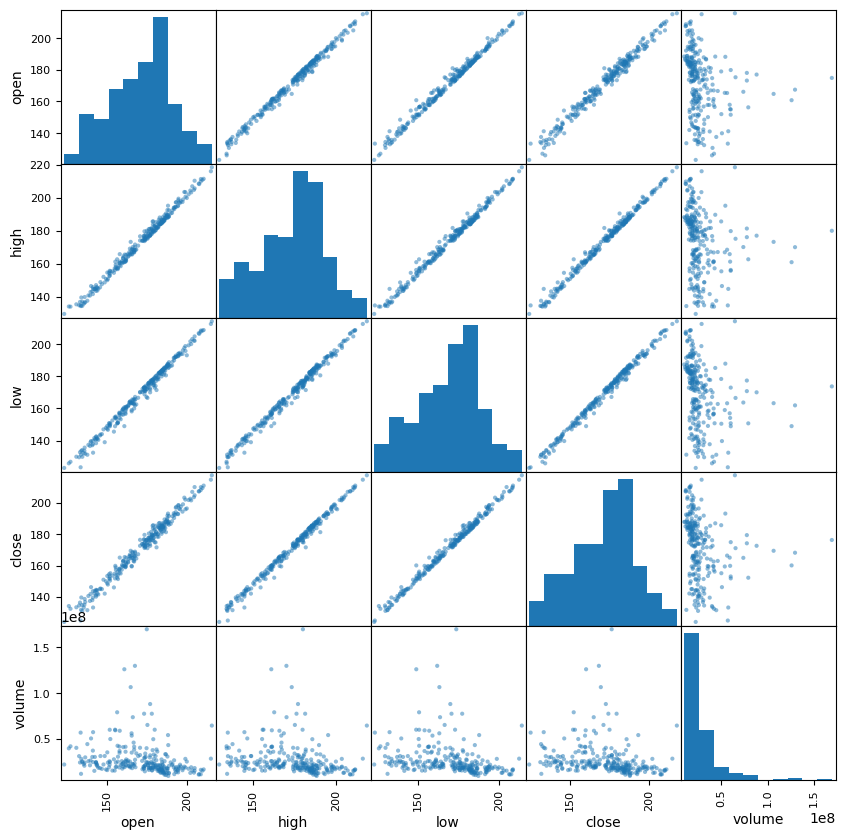

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
fb = pd.read_csv(
'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True)
from pandas.plotting import scatter_matrix
scatter_matrix(fb, figsize=(10, 10))

**Changing the diagonal from histograms to KDE**

array([[<Axes: xlabel='open', ylabel='open'>,
        <Axes: xlabel='high', ylabel='open'>,
        <Axes: xlabel='low', ylabel='open'>,
        <Axes: xlabel='close', ylabel='open'>,
        <Axes: xlabel='volume', ylabel='open'>],
       [<Axes: xlabel='open', ylabel='high'>,
        <Axes: xlabel='high', ylabel='high'>,
        <Axes: xlabel='low', ylabel='high'>,
        <Axes: xlabel='close', ylabel='high'>,
        <Axes: xlabel='volume', ylabel='high'>],
       [<Axes: xlabel='open', ylabel='low'>,
        <Axes: xlabel='high', ylabel='low'>,
        <Axes: xlabel='low', ylabel='low'>,
        <Axes: xlabel='close', ylabel='low'>,
        <Axes: xlabel='volume', ylabel='low'>],
       [<Axes: xlabel='open', ylabel='close'>,
        <Axes: xlabel='high', ylabel='close'>,
        <Axes: xlabel='low', ylabel='close'>,
        <Axes: xlabel='close', ylabel='close'>,
        <Axes: xlabel='volume', ylabel='close'>],
       [<Axes: xlabel='open', ylabel='volume'>,
        <Axes: xlabe

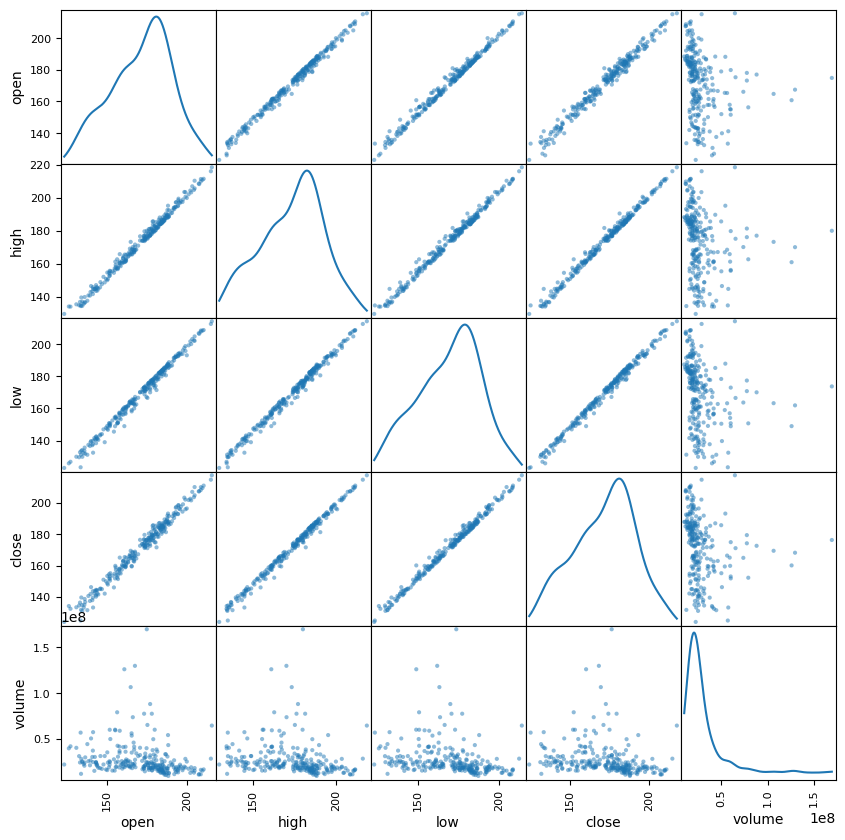

In [49]:
scatter_matrix(fb, figsize=(10, 10), diagonal='kde')

# **Lag plot**

**Lag plots let us see how the variable correlations with past observations of itself. Random data has no pattern:**

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

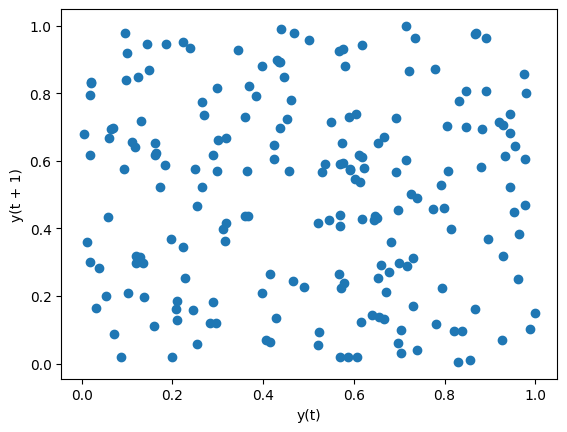

In [50]:
from pandas.plotting import lag_plot
np.random.seed(0) # make this repeatable
lag_plot(pd.Series(np.random.random(size=200)))

**Data with some level of correlation to itself (autocorrelation) may have patterns. Stock prices are highly auto-correlated**

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

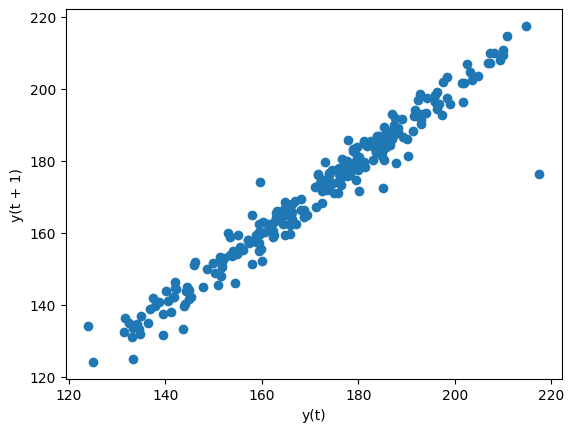

In [51]:
lag_plot(fb.close)

**The default lag is 1, but we can alter this with the lag parameter. Let's look at a 5 day lag (a week of trading activity)**

<Axes: xlabel='y(t)', ylabel='y(t + 5)'>

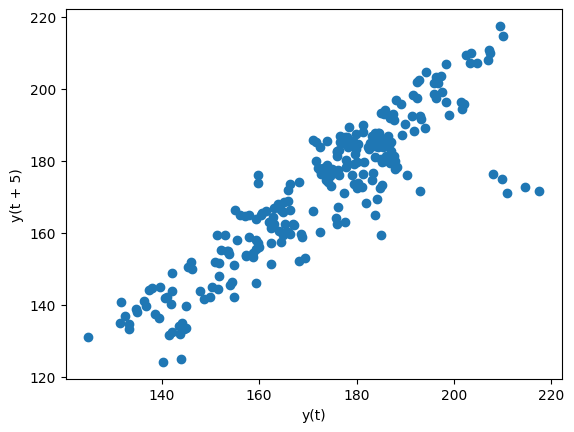

In [52]:
lag_plot(fb.close, lag=5)

# **Autocorrelation plots**

**We can use the autocorrelation plot to see if this relationship may be meaningful or just noise. Random data will not have any significant autocorrelation (it stays within the bounds below)**

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

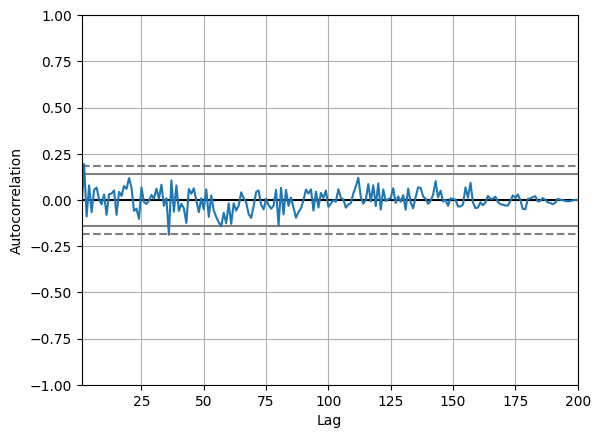

In [53]:
from pandas.plotting import autocorrelation_plot
np.random.seed(0) # make this repeatable
autocorrelation_plot(pd.Series(np.random.random(size=200)))

**Stock data, on the other hand, does have significant autocorrelation:**

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

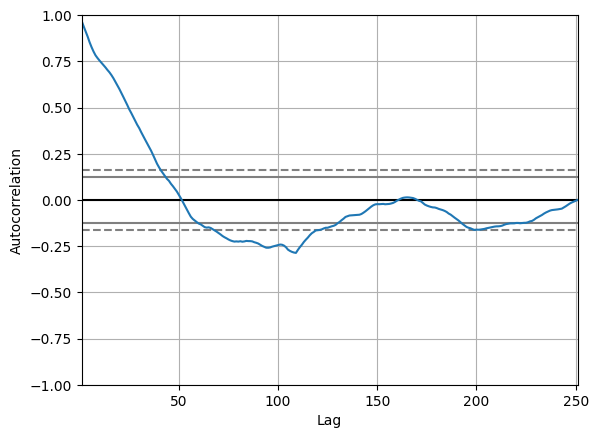

In [54]:
autocorrelation_plot(fb.close)

# **Bootstrap plot**

**This plot helps us understand the uncertainty in our summary statistics**

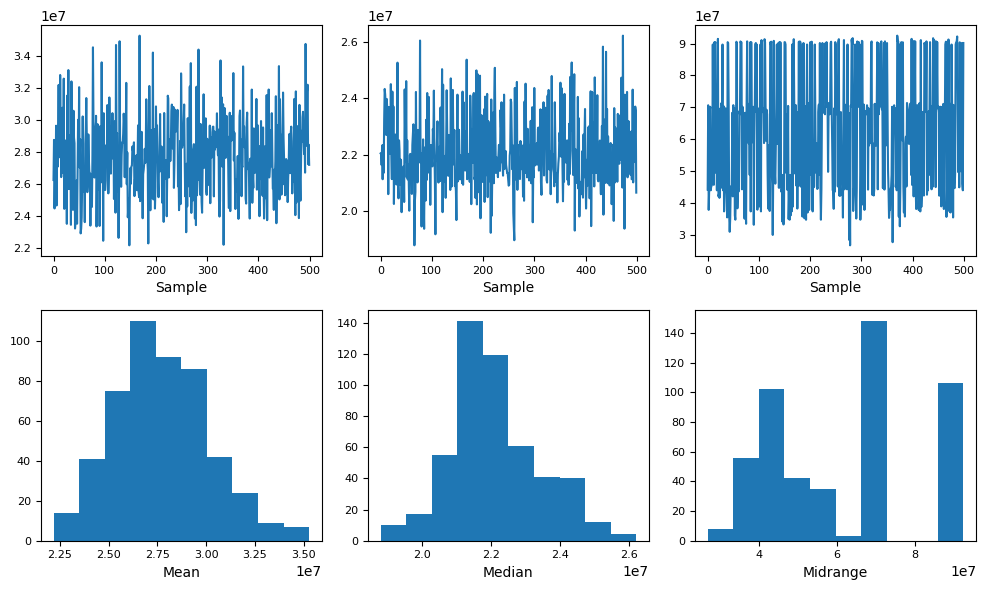

In [55]:
from pandas.plotting import bootstrap_plot
fig = bootstrap_plot(fb.volume, fig=plt.figure(figsize=(10, 6)))

---
---

# **Data Analysis**

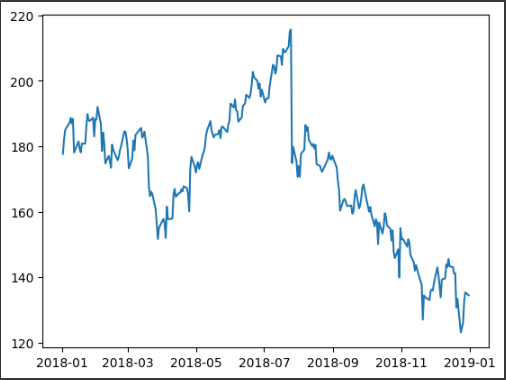

**The output above shows the plot for the OPEN column of the fb dataframe, we can try other columns like close, high, low and volume**



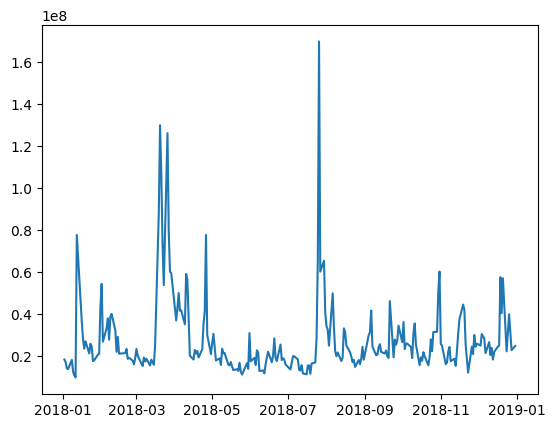

In [56]:
fb2 = pd.read_csv(
'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
plt.plot(fb.index, fb.volume) #trying the volume column
plt.show()

**The output below is the Scatter Plot between the low and high column, we can change it to another column and also we can remove the .head() to see all the values**

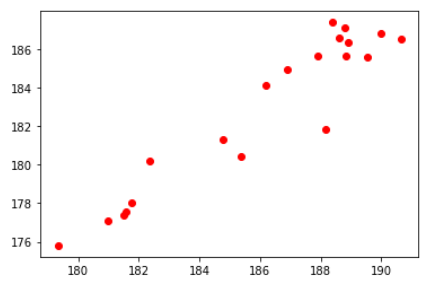

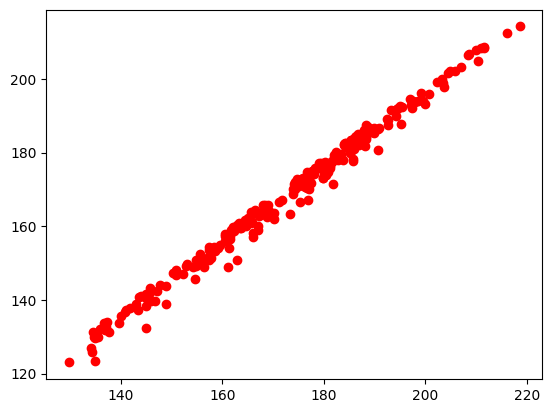

In [57]:
plt.plot('high', 'low', 'ro', data=fb) #removing .head() to see all values

**This output shows the histograms for the ml in the magType column of earthquake csv file**

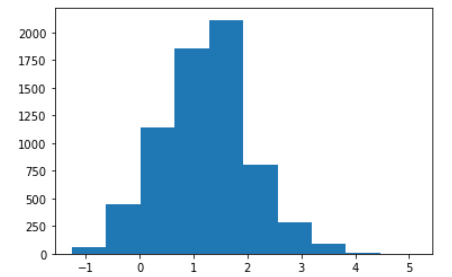

**We can try another type of magType, like md**

**The picture below shows the histogram values of the md under the magType column**

(array([  1.,  14., 155., 491., 445., 336., 159., 129.,  61.,   5.]),
 array([-1.23 , -0.696, -0.162,  0.372,  0.906,  1.44 ,  1.974,  2.508,
         3.042,  3.576,  4.11 ]),
 <BarContainer object of 10 artists>)

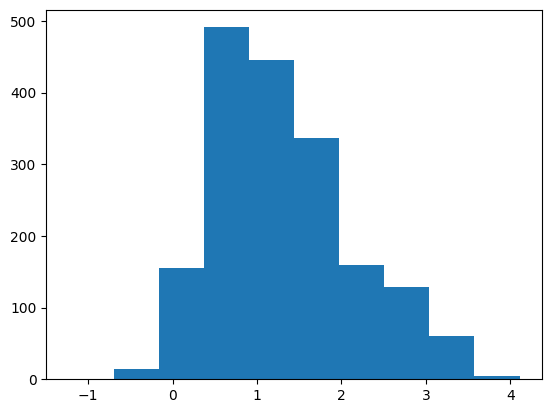

In [58]:
quakes = pd.read_csv('data/earthquakes.csv')
plt.hist(quakes.query('magType == "md"').mag)

plt.figure() and plt.subplots() allows us to create our own sub plots, with certain conditions and restrictions, we can customize our own plits

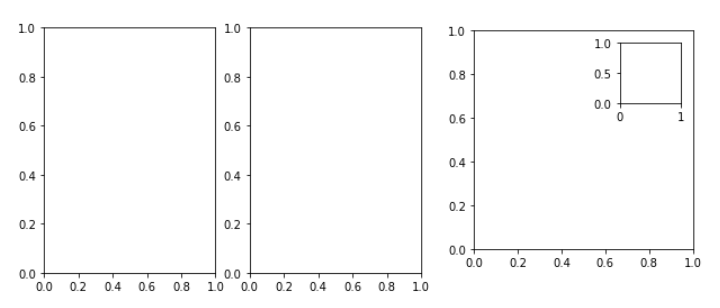

**The picture below shows the Evolution of Open Price of Facebook**

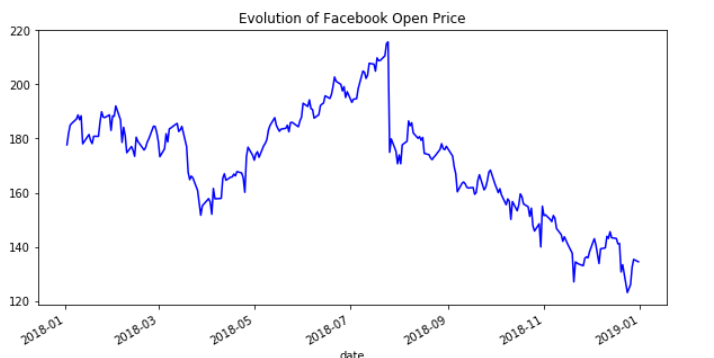

**Just like any other line graph, it shows the changes of the values every 2 months of the Open column of Facebook Dataframe**

**With few modifications, we can also see the sudden changes for the volume column**

<Axes: title={'center': 'Evolution of Facebook Volume Traded'}, xlabel='date'>

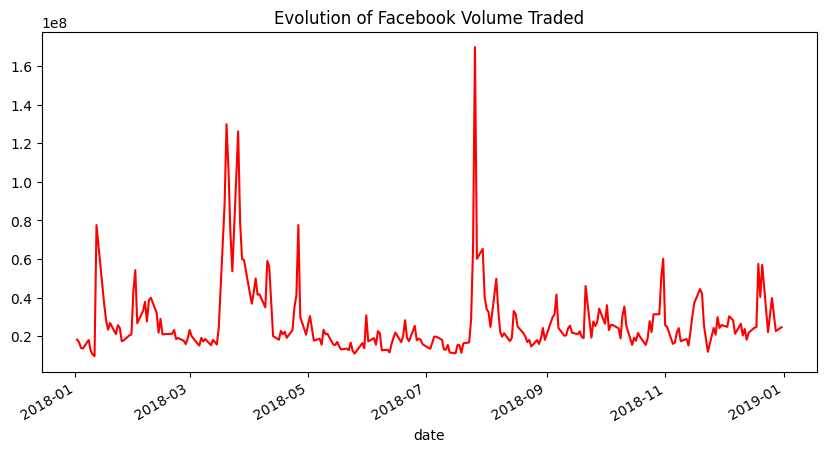

In [59]:
fb.plot(
kind='line',
y='volume',
figsize=(10, 5),
style='r-',
legend=False,
title='Evolution of Facebook Volume Traded'
)

**The plot below shows the difference between the volume traded and the High Low values of the Facebook**

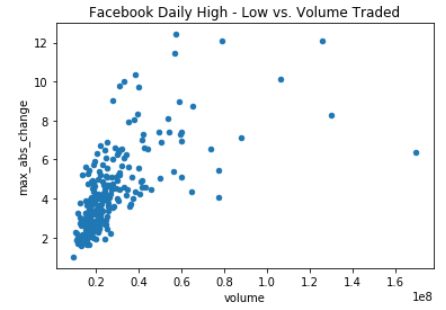

**We can change the y values and x values. Let's see the difference between the High and Low values**

<Axes: title={'center': 'Facebook Daily High vs. Low'}, xlabel='high', ylabel='low'>

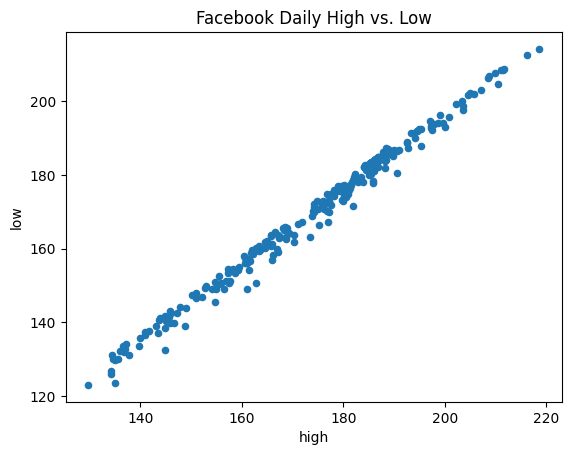

In [60]:
fb.assign().plot(
kind='scatter', x='high', y='low',
title='Facebook Daily High vs. Low'
)

**The graph below shows the amount Tsunamis and Earthquakes that happened on a certain place**

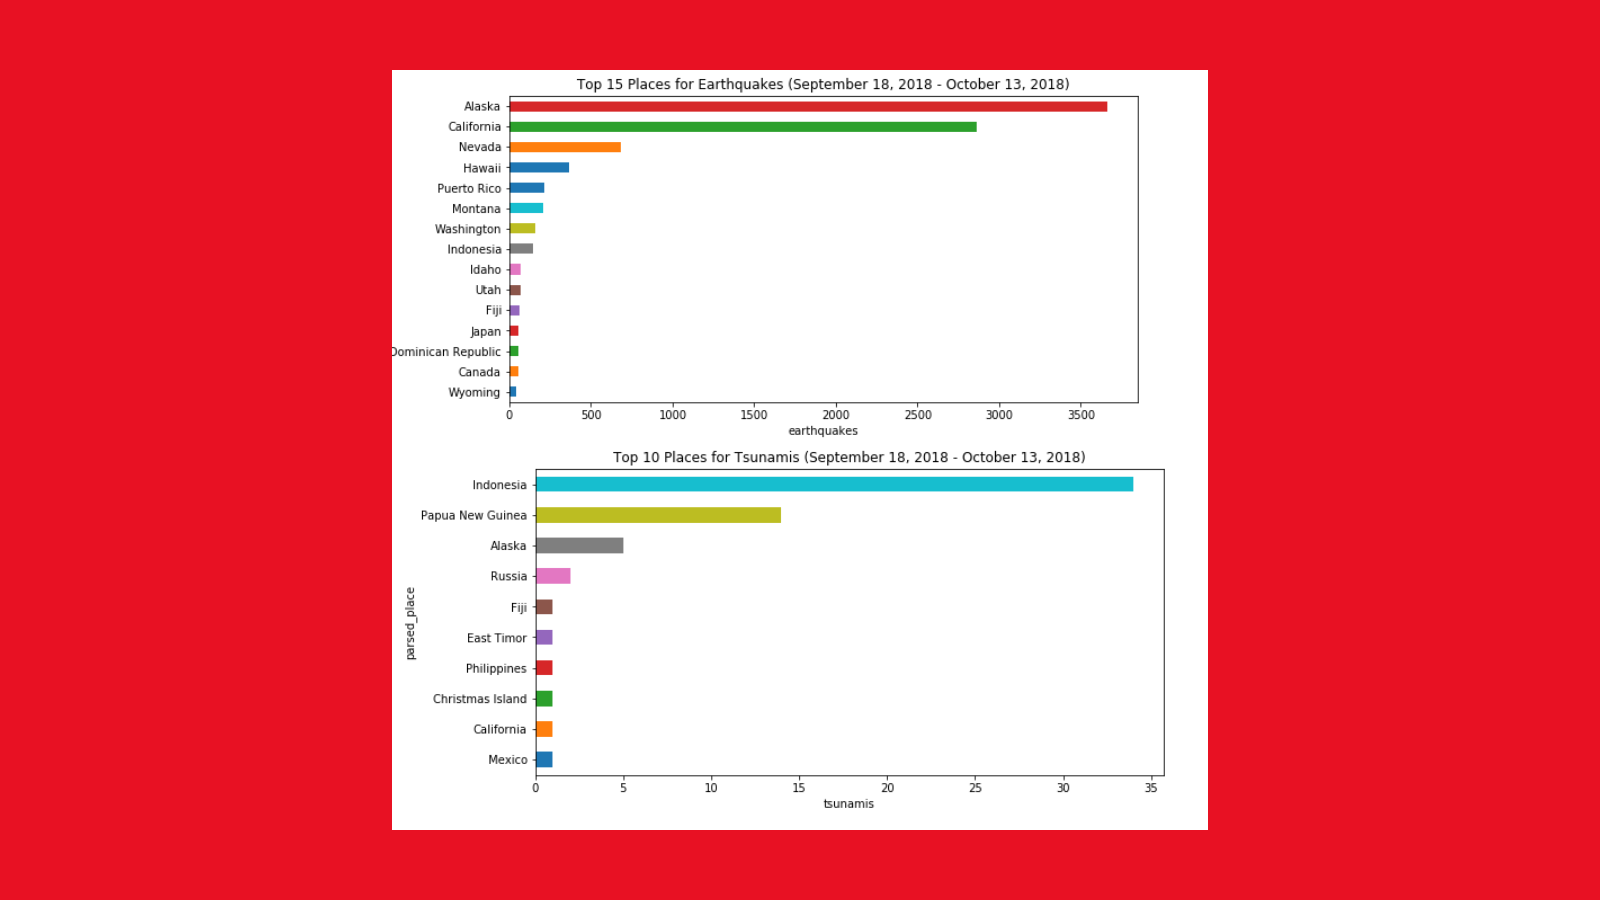

**We can also input two columns and compare it in a single graph**

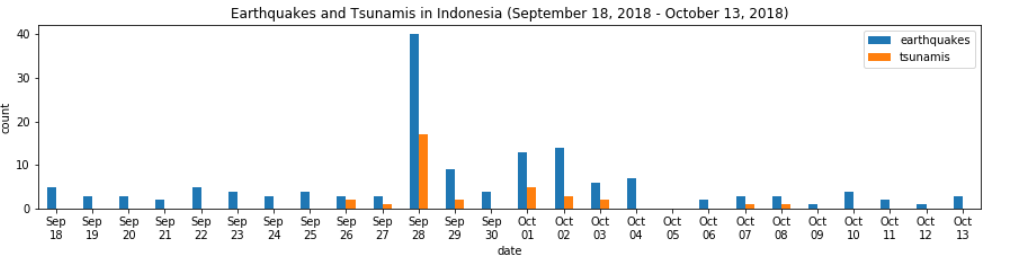

# **Supplementary Activity**

In [61]:
fb2 = pd.read_csv('data/fb_stock_prices_2018.csv')
fb2['date'] = pd.to_datetime(fb2['date'])
fb2.set_index('date', inplace=True)

In [62]:
eq2 = pd.read_csv('data/earthquakes.csv', parse_dates = True)

**1. Plot the rolling 20-day minimum of the Facebook closing price with the pandas plot() method**

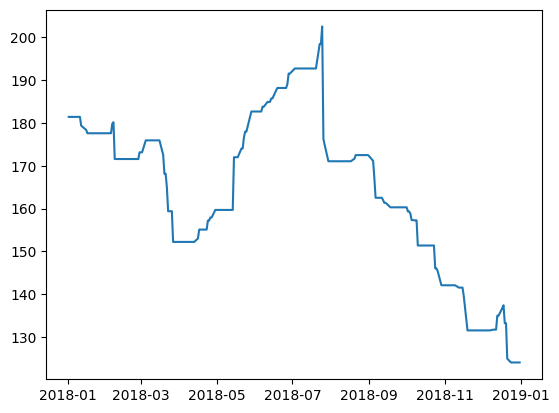

In [63]:
plt.plot(fb2['close'].rolling('20D').min())

**2. Create a histogram and KDE of the change from open to close in the price of Facebook stock.**

(array([ 4.,  9., 28., 43., 72., 50., 30.,  8.,  3.,  4.]),
 array([-8.18 , -6.419, -4.658, -2.897, -1.136,  0.625,  2.386,  4.147,
         5.908,  7.669,  9.43 ]),
 <BarContainer object of 10 artists>)

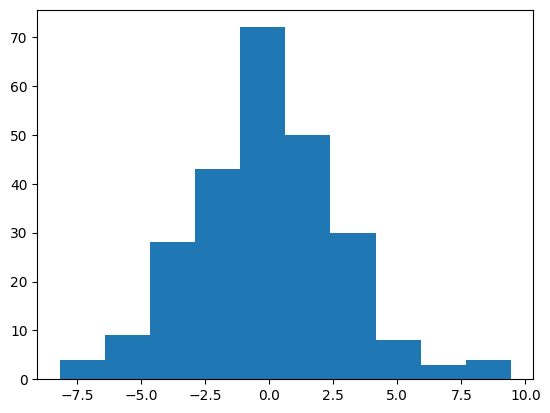

In [64]:
fb2['difference_open_close'] = fb2['open'] - fb2['close']

plt.hist(fb2.difference_open_close)

<Axes: title={'center': 'KDE of Change in Open and Close'}, ylabel='Density'>

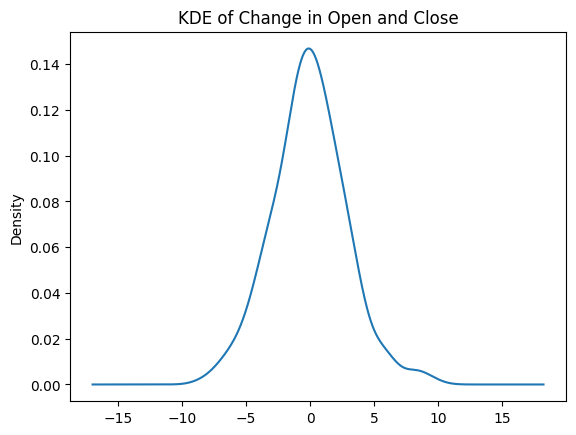

In [65]:
fb2.difference_open_close.plot(
kind='kde',
title='KDE of Change in Open and Close')

**3. Using the earthquake data, create box plots for the magnitudes of each magType used in Indonesia.**

Text(0, 0.5, 'magnitude')

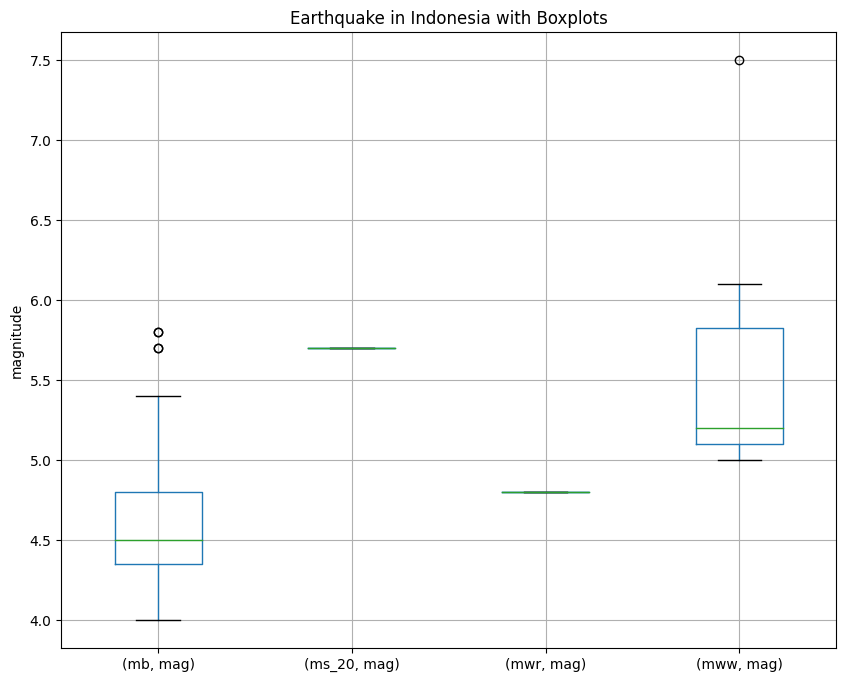

In [66]:
indo_earthquake = eq2.query("parsed_place == 'Indonesia'")
indo_earthquake[['mag', 'magType']].groupby('magType').boxplot(
 figsize=(10, 8), subplots=False
)
plt.title('Earthquake in Indonesia with Boxplots')
plt.ylabel('magnitude')

**4. Make a line plot of the difference between the weekly maximum high price and the weekly minimum low price for Facebook. This should be a single line.**

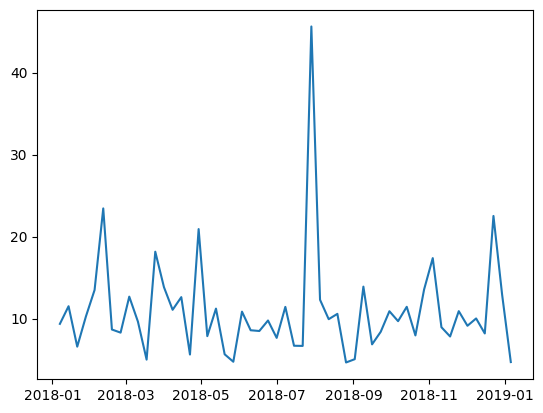

In [67]:
fb_weekly = fb2.resample('W').agg({'high': 'max', 'low': 'min'})
fb_weekly['high_low_difference'] = fb_weekly['high'] - fb_weekly['low']
plt.plot(fb_weekly.high_low_difference)


**5. Using matplotlib and pandas, create two subplots side-by-side showing the effect that after-hours trading has had on Facebook's stock price**


*   **The first subplot will contain a line plot of the daily difference between that day's opening price and the prior day's closing price (be sure to review the Time series section of Aggregating Pandas DataFrames for an easy way to do this).**
*   **The second subplot will be a bar plot showing the net effect this had monthly, using resample().**
*   **Bonus #1: Color the bars according to whether they are gains in the stock price (green) or drops in the stock price (red).**
*   **Bonus #2: Modify the x-axis of the bar plot to show the three letter abbreviation for the month.**





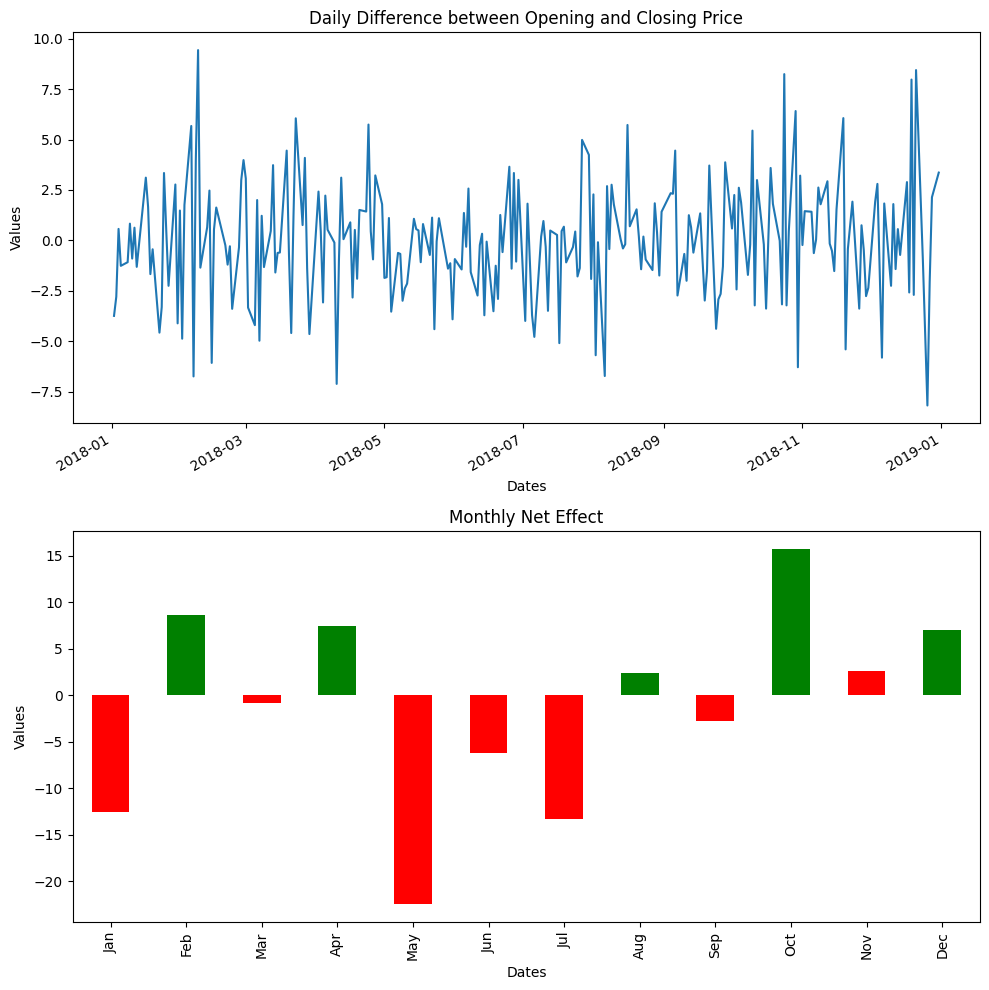

In [68]:
#creating the subplot
fig, ax = plt.subplots(2, figsize = [10,10])


#data for the subplots
difference = fb2['open'] - fb['close']
net_effect = difference.resample('M').sum()

#setting colors
colors = ['red', 'green', 'red', 'green', 'red', 'red', 'red', 'green', 'red', 'green', 'red', 'green']

difference.plot(ax = ax[0])
ax[0].set_title('Daily Difference between Opening and Closing Price')
ax[0].set_xlabel('Dates')
ax[0].set_ylabel('Values')

net_effect.plot(kind = 'bar', ax = ax[1], color = colors)
ax[1].set_title('Monthly Net Effect')
ax[1].set_xlabel('Dates')
ax[1].set_ylabel('Values')
ax[1].set_xticklabels(net_effect.index.strftime('%b'))

fig.tight_layout()



---



---



# **Conclusion**

In this activity, we are tasked to perform different Data Representation or Visualization using Matplotlib of the dataset that was given to us. We are tasked to represent data of the column with certain conditions. We used Bar Graph, Line Graph and Scattered Plot on representing the data in our dataset. For me, the subplots is one of the best plots in representing your data, it is cuztomizable but it is somewhat hard to configure. Knowing the parameters and the values that they will take and functions of the plots will be very crucial, it will be very hard to configure our data plotting if we do not know what is the purpose of the function that we will use, and also what values does our parameters will take.